![範例圖片](https://github.com/guanyuhoujeff/113_NKUST_Advanced_Econometrics/blob/main/homework3/HW3-exam.png?raw=true)

In [1]:
# !pip install scipy yfinance numpy

In [2]:
import yfinance as yf
from scipy.stats import norm
import numpy as np
import pandas as pd

1.台積電(tsmc)2019年的股價報酬率的基本統計分析

In [3]:
# 取得股票資料
code = "2330.TW" 
stock_price_data = yf.download(
    code, 
    start="2019-01-01",
    end="2020-01-01"
)  # Download data for 1 year
stock_price_data['return'] = stock_price_data['Close'].diff() / stock_price_data['Close'].shift()
stock_price_data["date"] = stock_price_data.index.values
stock_price_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,return,date
Date,,,,,,,,
2019-01-02,226.5,226.5,219.0,219.5,189.202316,32900482,NaN,2019-01-02
2019-01-03,214.0,218.0,214.0,215.5,185.754486,34087620,-0.018223,2019-01-03
2019-01-04,211.5,211.5,206.5,208.0,179.289703,65943521,-0.034803,2019-01-04
2019-01-07,212.0,214.0,211.0,213.0,183.599533,35442176,0.024038,2019-01-07
2019-01-08,212.0,212.5,210.0,211.0,181.875610,22694481,-0.009390,2019-01-08


In [4]:
stock_price_data.describe()

,Open,High,Low,Close,Adj Close,Volume,return,date
count,241.000000,241.000000,241.000000,241.000000,241.000000,2.410000e+02,240.000000,241
mean,261.651452,263.255187,259.817427,261.719917,230.654965,3.112792e+07,0.001809,2019-07-06 18:37:20.663900416
min,211.500000,211.500000,206.500000,208.000000,179.289703,1.021880e+05,-0.034803,2019-01-02 00:00:00
25%,239.000000,240.000000,236.000000,239.000000,206.441727,2.267061e+07,-0.007661,2019-04-11 00:00:00
50%,253.000000,254.500000,251.500000,254.000000,223.250137,2.855928e+07,0.001643,2019-07-08 00:00:00
75%,279.500000,280.500000,277.500000,279.500000,250.813293,3.527855e+07,0.011442,2019-10-04 00:00:00
max,341.500000,345.000000,341.500000,345.000000,309.590637,1.012246e+08,0.039749,2019-12-31 00:00:00
std,31.869115,32.047039,31.868804,32.027062,31.797515,1.385824e+07,0.013889,NaN


<br> 2.台積電的股價報酬率列聯表:
<br>以正負報酬與上半年及下半年當分類的二個因子.

In [5]:
# Q1: 使用 np.where() 來根據報酬率分類
stock_price_data['Q1'] = np.where(stock_price_data['return'] > 0, 'Positive', 'Negative')

# Q2: 分成上半年(1-6月)和下半年(7-12月)
stock_price_data['Q2'] = np.where(stock_price_data['date'].dt.month <= 6, 'First Half', 'Second Half')



# 創建列聯表
contingency_table = pd.crosstab(stock_price_data['Q1'], stock_price_data['Q2'])

print(contingency_table)

Q2        First Half  Second Half
Q1                               
Negative          57           63
Positive          58           63


3. plot the histogram of tsmc

In [6]:
import matplotlib.pyplot as plt

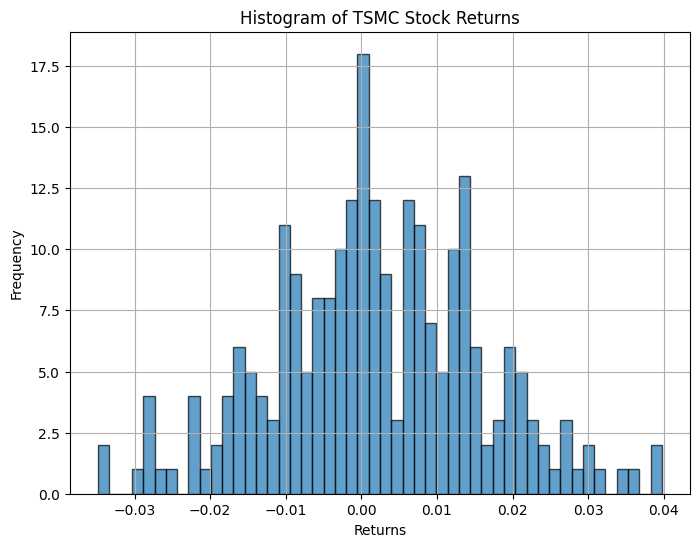

In [9]:
plt.figure(figsize=(8,6))
plt.hist(stock_price_data['return'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Histogram of TSMC Stock Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

4. Find integrate (exp(1/2*t2), t=-1..0) 

In [11]:
import sympy as sp

In [13]:
import numpy as np
from scipy import integrate

# 定義被積分函數
def integrand(t):
    return np.exp(0.5 * t**2)

# 計算積分
result, error = integrate.quad(integrand, -1, 0)

print(f"積分結果: {result:.6f}")
print(f"估計誤差: {error:.6e}")

積分結果: 1.194958
估計誤差: 1.326670e-14


5. find the MGF function of standard normal Z i.e., int( exp(xt) *dnorm)==>get: exp1/2*t2
and plot its MGF :exp(1/2*t2) as t=-1…1


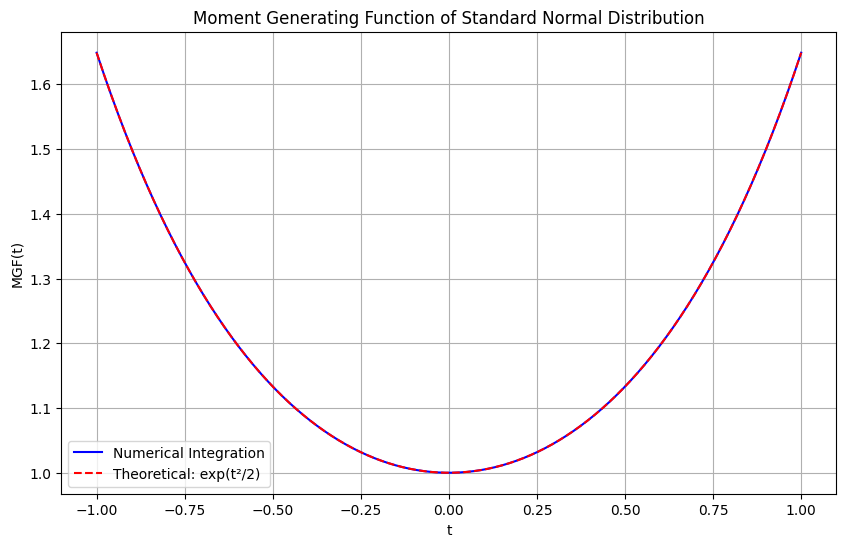

數值解和理論解的最大絕對誤差: 4.440892098500626e-16


In [15]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def integrand(x, t):
    # exp(xt) * dnorm(x)
    return np.exp(x*t) * (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)

# 計算不同t值的MGF
t_values = np.linspace(-1, 1, 100)
mgf_values = []

for t in t_values:
    # 積分區間取 [-10, 10]，因為標準常態分配在這個範圍外的機率很小
    result, _ = integrate.quad(integrand, -10, 10, args=(t,))
    mgf_values.append(result)

# 理論MGF值
theoretical_mgf = np.exp(t_values**2/2)

# 繪圖
plt.figure(figsize=(10, 6))
plt.plot(t_values, mgf_values, 'b-', label='Numerical Integration')
plt.plot(t_values, theoretical_mgf, 'r--', label='Theoretical: exp(t²/2)')
plt.xlabel('t')
plt.ylabel('MGF(t)')
plt.title('Moment Generating Function of Standard Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()

# 驗證數值解和理論解的差異
print("數值解和理論解的最大絕對誤差:", np.max(np.abs(np.array(mgf_values) - theoretical_mgf)))

6. Find the mean and variance given the data you found above using normal likelihood MLE and solving with  optim or maxlik.

In [17]:
import numpy as np
from scipy import optimize

# 生成一些模擬數據
np.random.seed(42)
true_mean = 0
true_std = 1
n_samples = 1000
data = np.random.normal(true_mean, true_std, n_samples)

def negative_log_likelihood(params, data):
    """計算負對數似然函數"""
    mu, sigma = params
    if sigma <= 0:  # 確保標準差為正
        return np.inf
    
    return -np.sum((-0.5 * np.log(2 * np.pi) - 
                    np.log(sigma) - 
                    (data - mu)**2 / (2 * sigma**2)))

# 初始猜測值
initial_guess = [0.1, 1.1]  # [mu, sigma]

# 使用scipy.optimize來最小化負對數似然函數
result = optimize.minimize(negative_log_likelihood, 
                         initial_guess,
                         args=(data,),
                         method='Nelder-Mead')

# 獲取估計結果
estimated_mean, estimated_std = result.x

print(f"真實均值: {true_mean:.4f}")
print(f"估計均值: {estimated_mean:.4f}")
print(f"真實標準差: {true_std:.4f}")
print(f"估計標準差: {estimated_std:.4f}")
print("\n最佳化結果:")
print(f"收斂狀態: {result.success}")
print(f"迭代次數: {result.nit}")

真實均值: 0.0000
估計均值: 0.0193
真實標準差: 1.0000
估計標準差: 0.9787

最佳化結果:
收斂狀態: True
迭代次數: 33
